<a href="https://colab.research.google.com/github/SANPREET-KAUR/climate-change/blob/main/Climatechange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url="https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
df=pd.read_csv(url)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


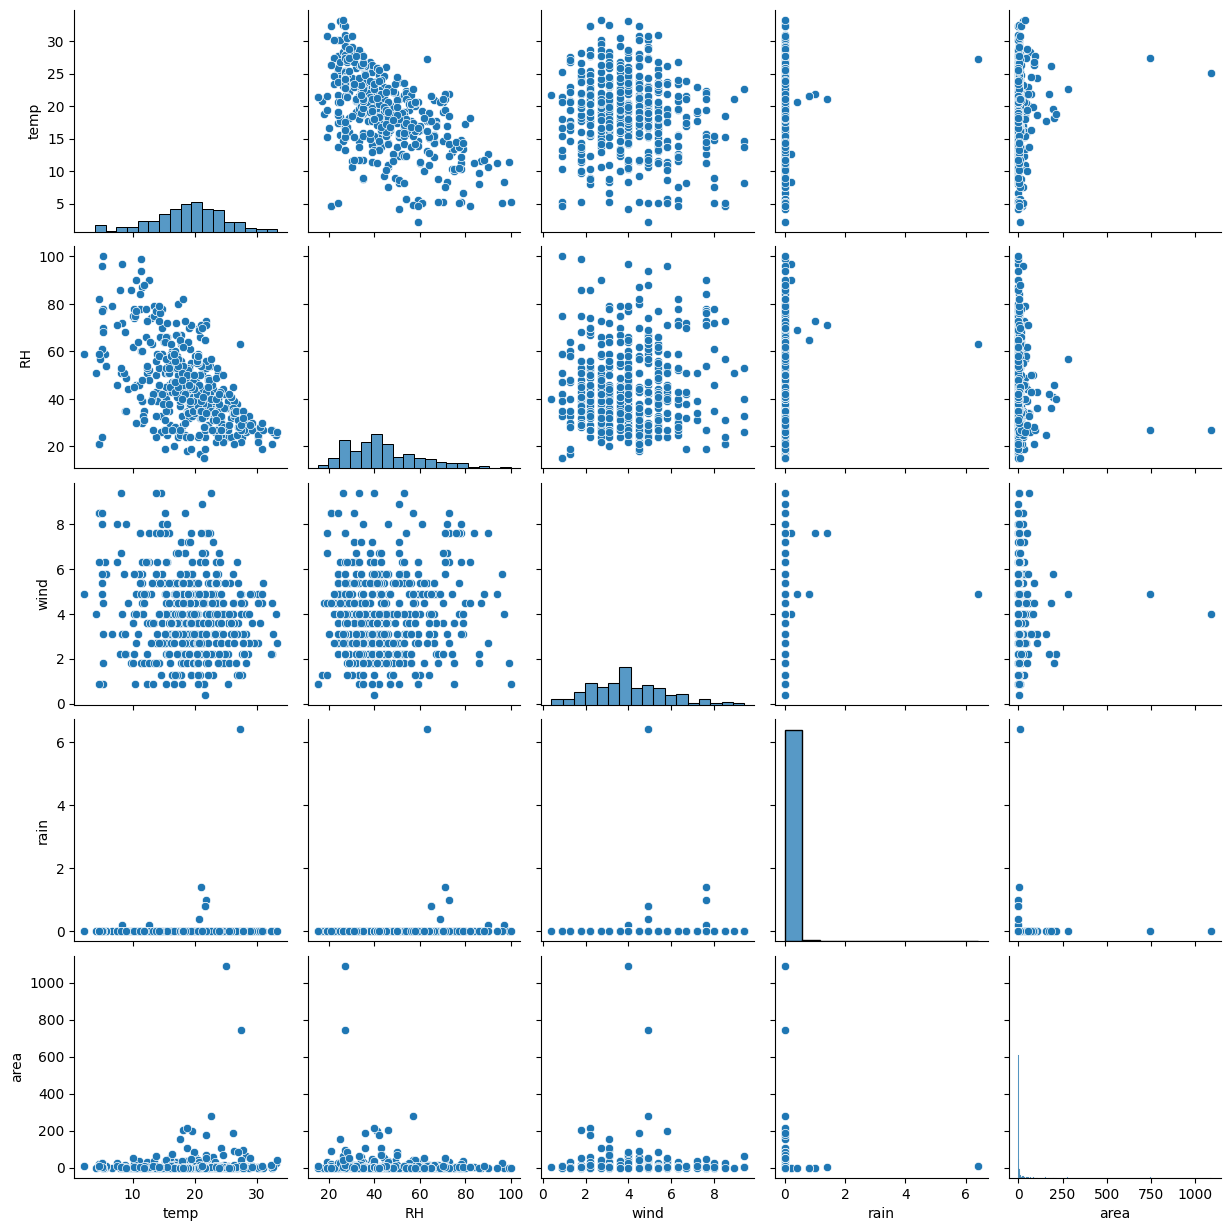

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['temp','RH','wind','rain','area']])
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
df['large_fire']=(df['area']>df['area'].median()).astype(int)
x=df[['temp','RH','wind','rain']]
y=df['large_fire']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.64      0.64        53
           1       0.62      0.61      0.61        51

    accuracy                           0.62       104
   macro avg       0.62      0.62      0.62       104
weighted avg       0.62      0.62      0.62       104



In [7]:
importances=model.feature_importances_
for feature,importance in zip(x.columns,importances):
    print(f"{feature}:{importance:.2f}")

temp:0.42
RH:0.35
wind:0.22
rain:0.01
